In [14]:
import pandas as pd

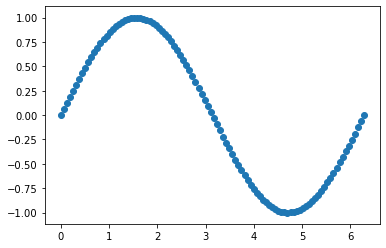

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

plt.scatter(x, y)

In [10]:
x[y > .75] / np.pi

array([0.28282828, 0.3030303 , 0.32323232, 0.34343434, 0.36363636,
       0.38383838, 0.4040404 , 0.42424242, 0.44444444, 0.46464646,
       0.48484848, 0.50505051, 0.52525253, 0.54545455, 0.56565657,
       0.58585859, 0.60606061, 0.62626263, 0.64646465, 0.66666667,
       0.68686869, 0.70707071, 0.72727273])

In [8]:
np.pi  / 2

1.5707963267948966

In [9]:
1.57 / np.pi

0.4997465213085514

In [11]:
x[y < -.75] / np.pi

array([1.27272727, 1.29292929, 1.31313131, 1.33333333, 1.35353535,
       1.37373737, 1.39393939, 1.41414141, 1.43434343, 1.45454545,
       1.47474747, 1.49494949, 1.51515152, 1.53535354, 1.55555556,
       1.57575758, 1.5959596 , 1.61616162, 1.63636364, 1.65656566,
       1.67676768, 1.6969697 , 1.71717172])

Buy:

.5 * pi < x < .75 * pi

Sell:

1.5 * pi < x < 1.75 * pi.

#### 1. Investigate data for correlation between angle and entry / exit

In [18]:
sym = 'DOCU'
suffix = '25082020.pickle'
loader = './data/prepared/engineered/'
df = pd.read_pickle('{}{}{}'.format(loader,sym,suffix))
df.head()

,open,high,low,close,volume,date,SYMBOL,prev_close,diff_1,pct_change,...,close_xsinx,close_xcosx,close_sinxcosx,close_xsinxcosx,close_xsinx2,close_xcosx2,close_sinxcosx2,close_xsinxcosx2,close_xtanx,close_xtanx2
252,213.490,213.53,207.6881,209.47,2763874,2020-08-18,DOCU,207.70,1.77,0.008522,...,0.000053,-0.008266,-0.006017,-0.000051,0.000029,-0.008433,-0.003404,-0.000029,-0.002136,-0.001243
251,202.240,209.83,201.9800,207.70,2590486,2020-08-17,DOCU,199.71,7.99,0.040008,...,0.001063,-0.012546,-0.008335,-0.000333,0.001028,-0.016005,-0.010278,-0.000411,-0.121149,-0.091654
250,201.355,204.46,197.2100,199.71,1952648,2020-08-14,DOCU,199.38,0.33,0.001655,...,0.000044,0.000390,0.006303,0.000010,0.000043,0.000552,0.008624,0.000014,-0.006821,-0.004676
249,194.220,203.85,193.6200,199.38,4048023,2020-08-13,DOCU,193.30,6.08,0.031454,...,0.000844,-0.013924,-0.011872,-0.000373,0.000883,-0.010982,-0.009798,-0.000308,0.063709,0.084419
248,192.650,196.88,189.1200,193.30,4591084,2020-08-12,DOCU,191.82,1.48,0.007716,...,0.000132,-0.006377,-0.014104,-0.000109,0.000150,-0.005882,-0.014862,-0.000115,0.005256,0.006550


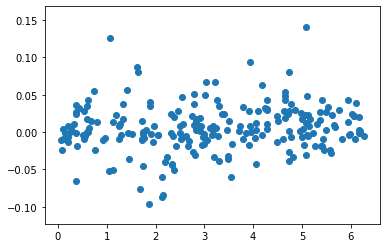

In [24]:
plt.scatter(df['close_rad'], df['%close'])

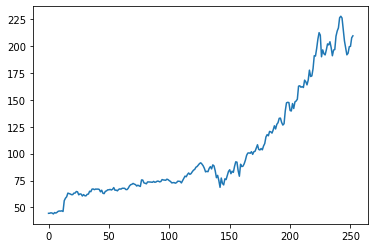

In [25]:
plt.plot(df['close'])

#### Build a function that allows me to label the chart by hand

Where do I even start with this? 

input()

and 

plot.

If I can iteratively plot the chart and take input with an axvline on the current point, maybe I could do that. 

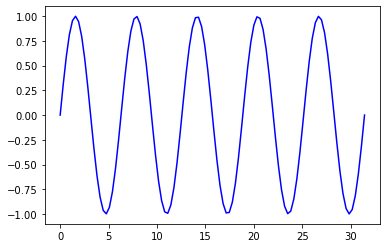

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10*np.pi, 100)
y = np.sin(x)

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'b-')
plt.show()

for phase in np.linspace(0, 10*np.pi, 100):
    line1.set_ydata(np.sin(0.5 * x + phase))
    fig.canvas.draw()

<IPython.core.display.Javascript object>


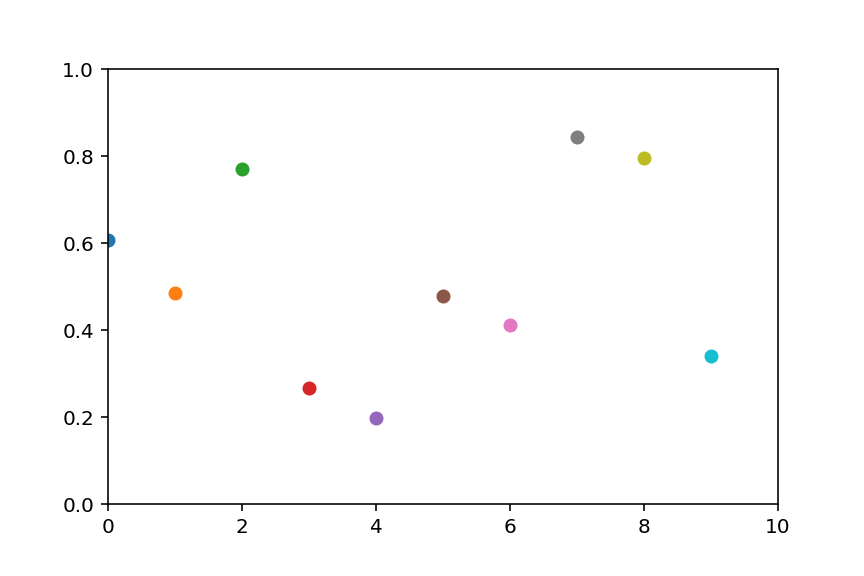

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

plt.axis([0, 10, 0, 1])
plt.ion()

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    fig.canvas.draw()
    time.sleep(.05)



<IPython.core.display.Javascript object>


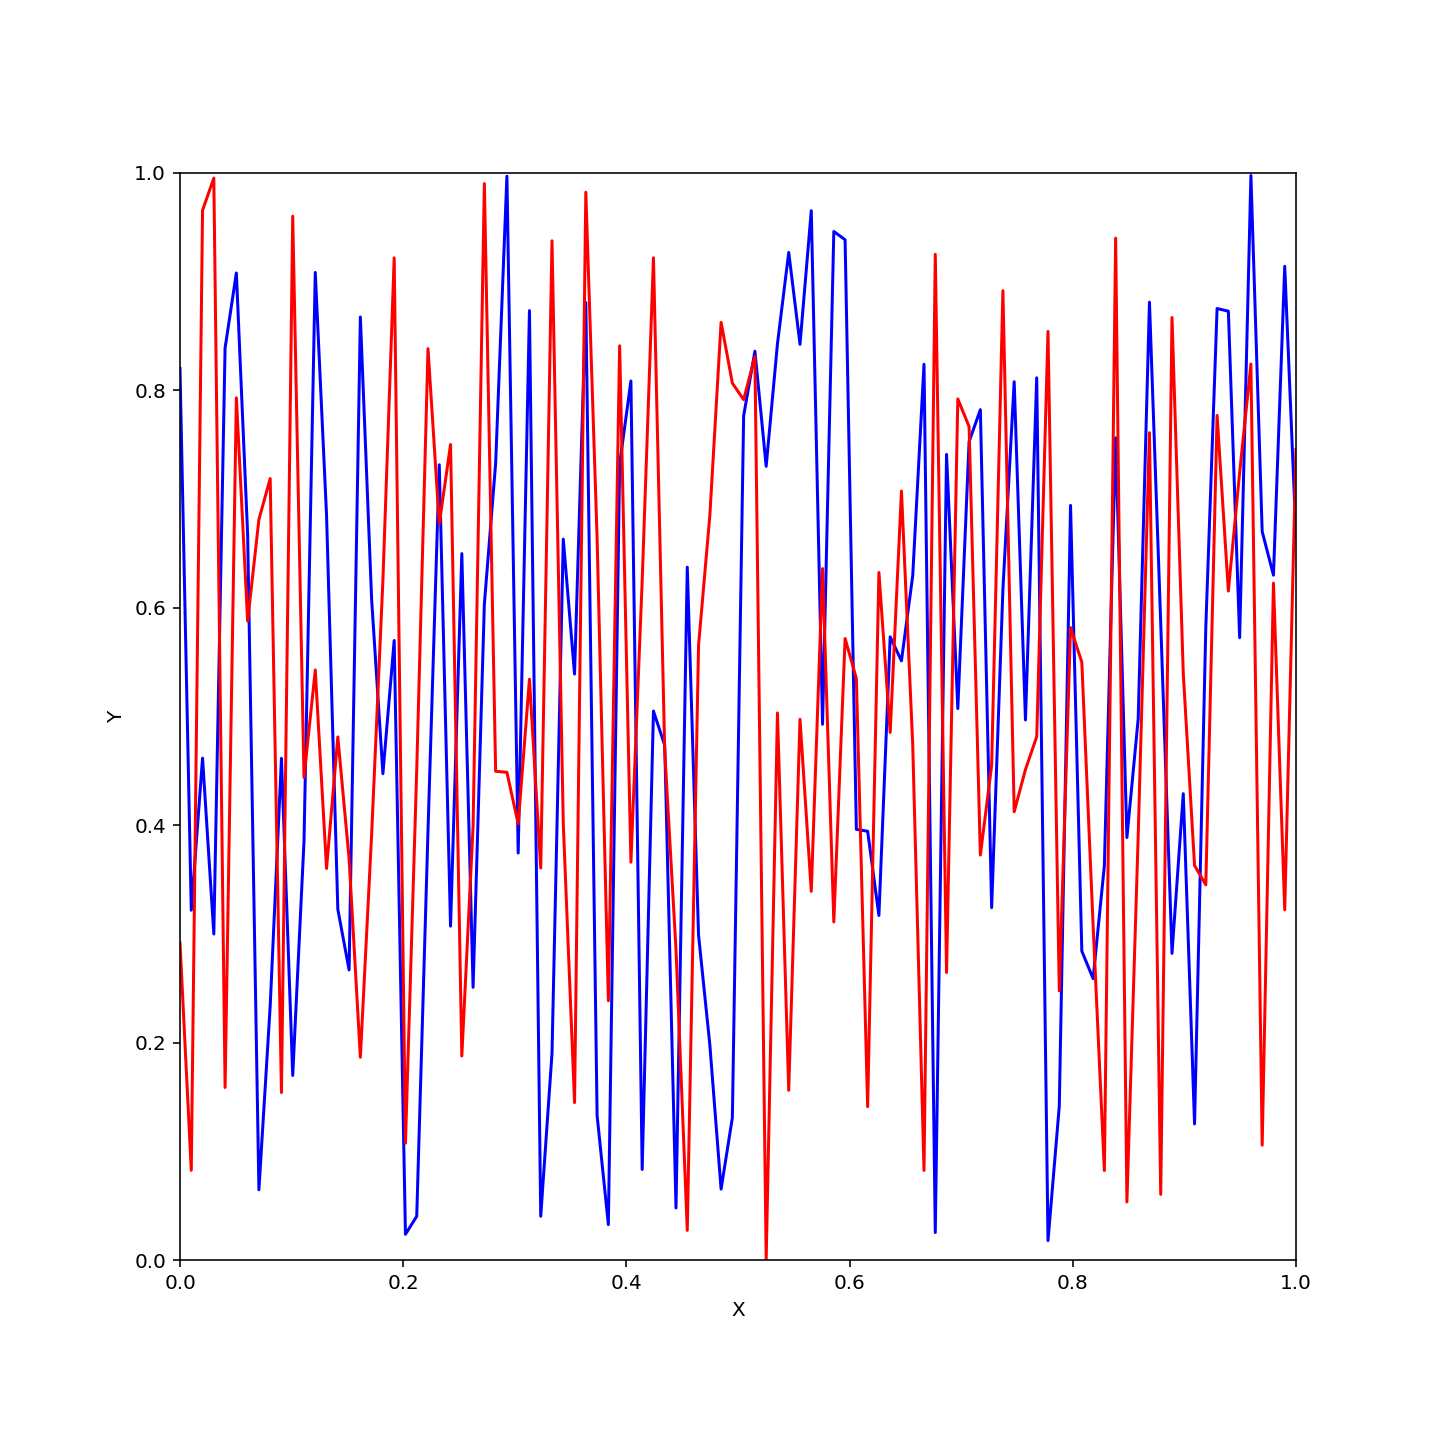

In [18]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

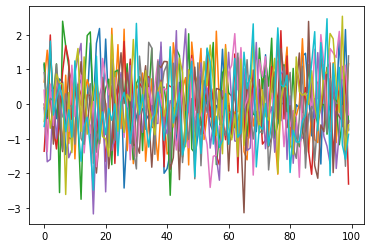

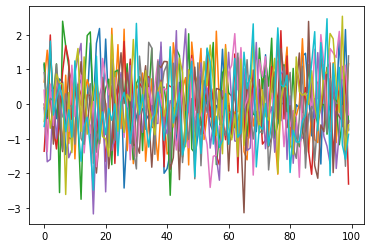

In [23]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

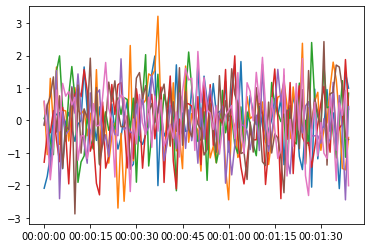

In [24]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline

i = pd.date_range('2013-1-1',periods=100,freq='s')

while True:
    try:
        plt.plot(pd.Series(data=np.random.randn(100), index=i))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    except KeyboardInterrupt:
        break

[4, 2, 3]


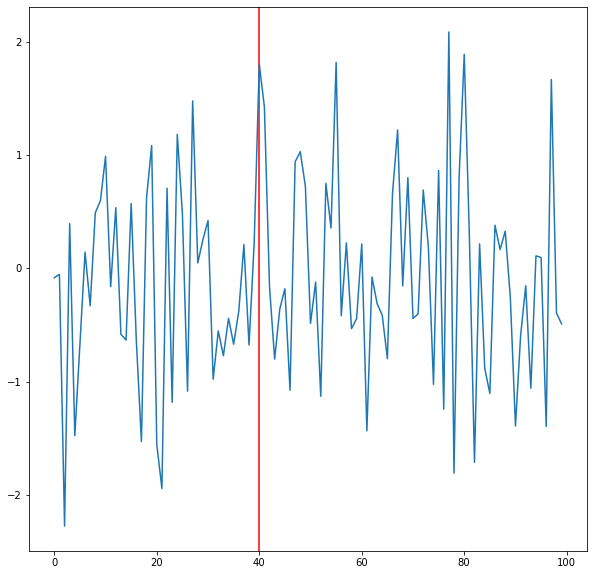

In [36]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
plt.figure(figsize=(10,10))
values = []
for i in range(3):
    display.clear_output(wait=True)
    pl.clf()
    pl.axvline(40, c='r')
    pl.plot(pl.randn(100))
    display.display(pl.gcf())
    values.append(int(input("Write something: ")))
    if i == 2:
        display.clear_output(wait=True)
print(values)